In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
link = 'https://assets.datacamp.com/production/repositories/2292/datasets/52b52cb1ca28ce10f9a09689325c4d94d889a6da/experiment_data.csv'
df = pd.read_csv(link, parse_dates = ['visit_date'])

In [4]:
df.tail()

,visit_date,condition,clicked_adopt_today
583,2018-01-31,test,0
584,2018-01-31,test,0
585,2018-01-31,test,1
586,2018-01-31,test,0
587,2018-01-31,test,1


In [3]:
df.groupby(['condition'])['clicked_adopt_today'].mean()

condition
control    0.166667
test       0.384354
Name: clicked_adopt_today, dtype: float64

In [5]:
expt_data_conv_rate = df.groupby(['visit_date','condition'])['clicked_adopt_today'].mean()

In [9]:
expt_data_conv_rate = pd.DataFrame(expt_data_conv_rate.unstack(level=1))

In [12]:
expt_data_conv_rate

clicked_adopt_today          
condition              control      test
visit_date                              
2018-01-01            0.250000  0.428571
2018-01-02            0.250000  0.333333
2018-01-03            0.000000  0.500000
2018-01-04            0.363636  0.250000
2018-01-05            0.111111  0.571429
2018-01-06            0.111111  0.500000
2018-01-07            0.285714  0.500000
2018-01-08            0.066667  0.500000
2018-01-09            0.000000  0.384615
2018-01-10            0.181818  0.333333
2018-01-11            0.000000  0.700000
2018-01-12            0.300000  0.470588
2018-01-13            0.111111  0.375000
2018-01-14            0.076923  0.400000
2018-01-15            0.388889  0.363636
2018-01-16            0.142857  0.428571
2018-01-17            0.222222  0.500000
2018-01-18            0.000000  0.250000
2018-01-19            0.083333  0.545455
2018-01-20            0.285714  0.166667
2018-01-21            0.125000  0.357143
2018-01-22            0.272727  0.333333
2018-01-23            0.333333  0.000000
2018-01-24            0.000000  0.250000
2018-01-25            0.230769  0.357143
2018-01-26            0.000000  0.300000
2018-01-27            0.111111  0.100000
2018-01-28            0.250000  0.333333
2018-01-29            0.000000  0.375000
2018-01-30            0.000000  0.300000
2018-01-31            0.142857  0.428571

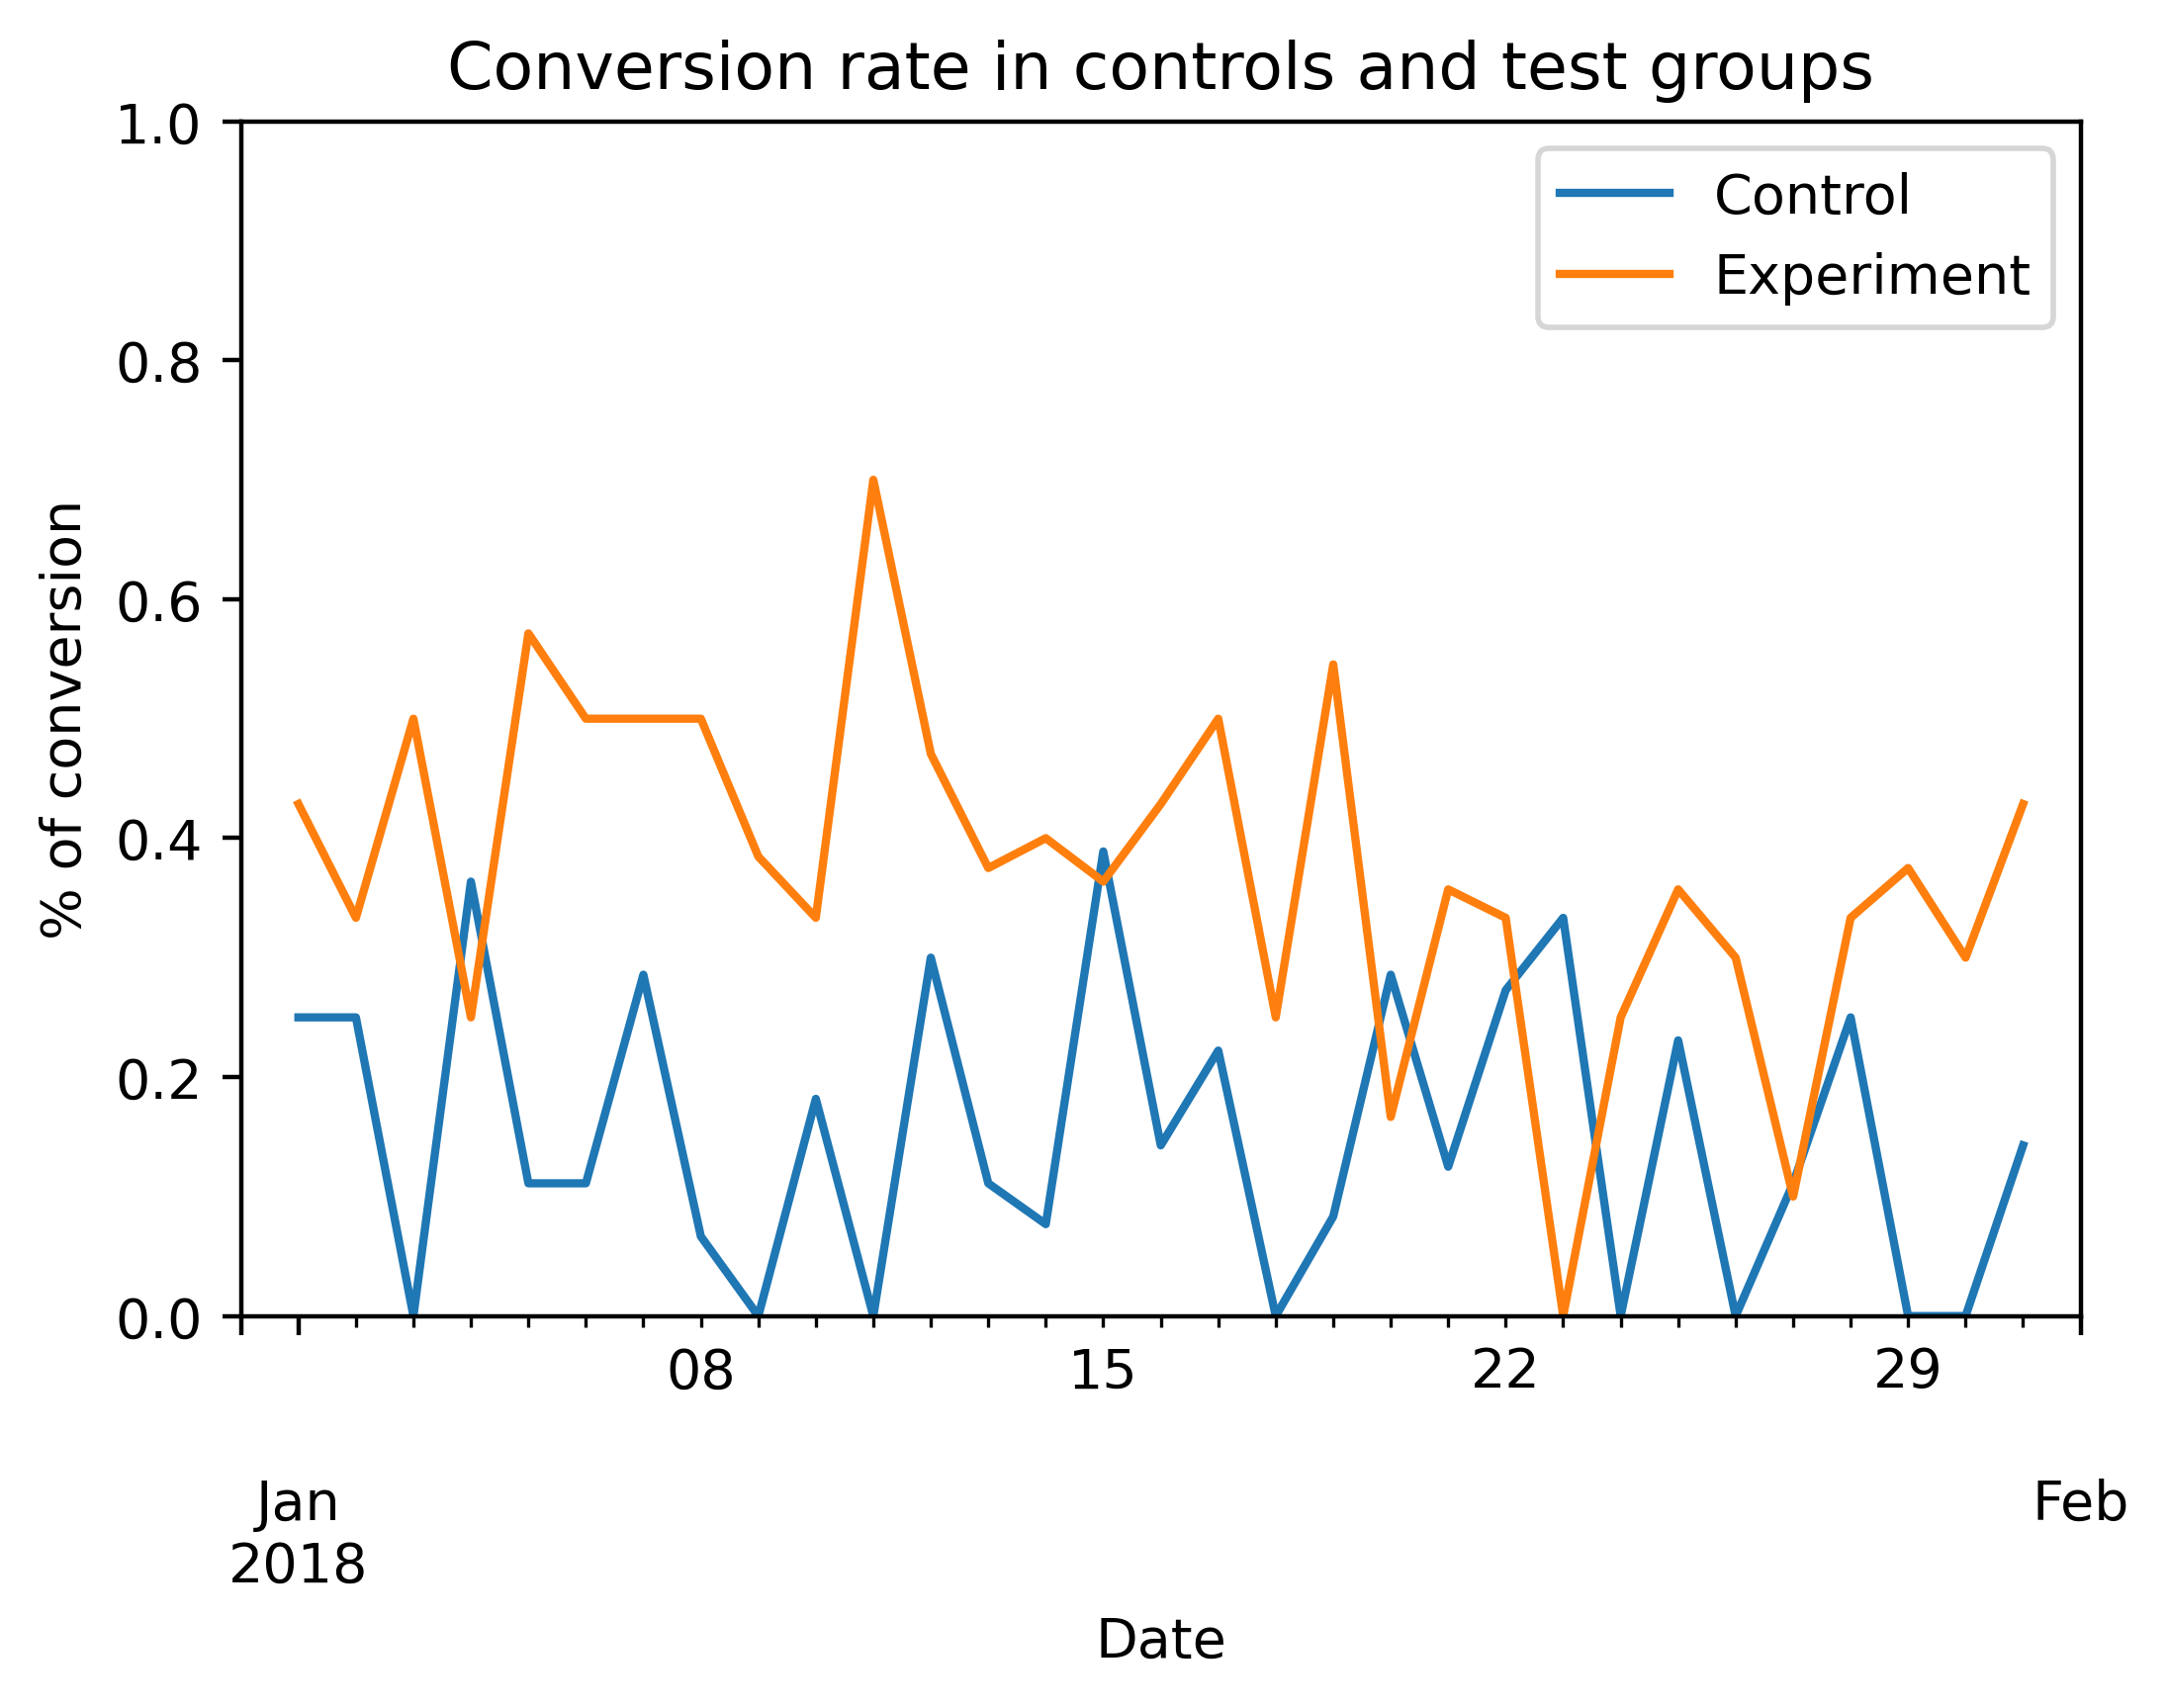

In [18]:
import datetime as datetime
my_labels=['Control', 'Experiment']
expt_data_conv_rate.plot()
plt.title('Conversion rate in controls and test groups')
plt.xlabel('Date')
plt.ylabel('% of conversion')
plt.ylim(0,1)
plt.xlim([datetime.date(2017, 12, 31), datetime.date(2018, 2, 1)])
plt.legend(labels=my_labels)
plt.show()

In [19]:
control_df = df[df['condition'] == 'control']
test_df = df[df['condition'] == 'test']

In [21]:
control_df = control_df.drop('condition', axis=1)
test_df = test_df.drop('condition', axis=1)

In [27]:
control= control_df['clicked_adopt_today']
test = test_df['clicked_adopt_today']

In [28]:
from scipy import stats
results = stats.ttest_ind(control, test)

p_value = results[1]
print("The p value is " + str(p_value))

In [55]:
print('Control conversion rate:', np.mean(control))
print('Personlization conversion rate:', np.mean(test))

Control conversion rate: 0.16666666666666666
Personlization conversion rate: 0.3843537414965986


In [54]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'
print(lift(control, test))

130.61%


In [56]:
from statsmodels.stats.power import TTestIndPower
import math

def sample_size_calculator(rA, diff, alpha=0.05, ratio=1.0, power=0.8):
    # parameters for power analysis 
    """
    -return sample size for the AB test given 
    -baseline conversion rate rA 
    -required minimum difference dr = rB-rA,
    -significance level alpha
    -statistical power 1-beta
    """
    rA = rA
    dr = diff
    rB = rA+dr
    r = (rA+rB)/2
    pooled_var = 2*r*(1-r) # rA*(1-rA) + rB*(1-rB)
    effect_size = dr/np.sqrt(pooled_var)

    alpha = alpha
    power = power 
    ratio = ratio# how balaned is your dataset
    # perform power analysis
    analysis = TTestIndPower()
    result = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio, alpha=alpha)
    print('Effect size: {:.2f}, and total sample size: {}'.format(effect_size,math.ceil(result)))
    print('Or sample size by condition: {}'.format(math.ceil(result/2)))

sample_size_calculator(0.39, 0.2)

Effect size: 0.28, and total sample size: 198
Or sample size by condition: 99
